# **Financial Applicactions with ML & AI**

<img style="float: right;" src="https://github.com/torreblanca99/course_financial_applications/blob/develop/docs/img/logo_bourbaki.png?raw=1" width="100"/>

## **Module II:** Value Risk
#### Topic:  Time Series *ARCH/GARCH* and *LSTM*.

##### Name: Julio César Avila Torreblanca

- **Objective**: apply ARCH and GARCH problem to a time series analysis.

- **Contents**:
    - Notes:
        - ARCH/GARCH/LSTM Algorithm
    - Code:
        1. Libraries and parameters
        2. Read Data
        3. EDA
        4. Modeling
        5. Evaluation
----

# Class Notes: Time Series Analysis with ARCH, GARCH, and LSTM Models

## Volatility Modeling with ARCH and GARCH

### ARCH Models

#### Basic Concept

The AutoRegressive Conditional Heteroskedasticity (ARCH) model is designed to model time-varying volatility in time series data by using past squared observations to predict current variance.

#### Mathematical Formulation

An ARCH(p) model is given by:

- **Error Term**:
  $$
  \epsilon_t = \sigma_t w_t
 $$
  where $w_t$ is white noise.

- **Volatility (Variance) Equation**:
  $$
  \sigma^2_t = \alpha_0 + \alpha_1 \epsilon^2_{t-1} + \ldots + \alpha_p \epsilon^2_{t-p}
  $$

- **Assumptions**:
  - **Stationarity**: The series should be stationary in mean, meaning that the statistical properties do not change over time.
  - **No Autocorrelation in Errors**: Residuals should not show autocorrelation.
  - **Normality of Errors**: The error terms are assumed to be normally distributed.

#### Advantages and Disadvantages

- **Advantages**:
  - Suitable for capturing volatility clustering.
  - Relatively simple to implement.

- **Disadvantages**:
  - Requires large datasets for complex models.
  - May not perform well if assumptions are violated.



### GARCH Models

#### Basic Concept

The Generalized ARCH (GARCH) model extends ARCH by including past conditional variances, offering a more comprehensive approach to forecasting volatility.

#### Mathematical Formulation

A GARCH(p, q) model's variance equation is:

$$
\sigma^2_t = \alpha_0 + \sum_{i=1}^{p} \alpha_i \epsilon^2_{t-i} + \sum_{j=1}^{q} \beta_j \sigma^2_{t-j}
$$

#### Advantages and Disadvantages

- **Advantages**:
  - Captures both short-term and long-term volatility.
  - Generally provides better forecast accuracy than simple ARCH.

- **Disadvantages**:
  - More computationally intensive.
  - Sensitivity to model specification and initial values.

## Long Short-Term Memory (LSTM) Networks

### Introduction

LSTM networks are a type of recurrent neural network (RNN) designed to learn from sequences of data with long-range dependencies. They are particularly effective in handling time series data with complex temporal structures.

### How LSTMs Work

LSTMs have a specialized architecture that includes a memory cell, along with input, output, and forget gates. These components allow the network to retain information over extended sequences without succumbing to the vanishing gradient problem typical in standard RNNs.

### Applications in Time Series

- **Financial Forecasting**: LSTMs can be used to predict stock prices, interest rates, and other financial indicators.
- **Anomaly Detection**: Suitable for identifying unusual patterns indicative of fraud or other financial risks.

### Advantages and Disadvantages

- **Advantages**:
  - Ability to remember long-term dependencies makes LSTMs powerful for sequence prediction.
  - Flexibility in modeling complex temporal relationships.

- **Disadvantages**:
  - Requires large amounts of data and computational resources.
  - Interpretability can be challenging compared to simpler models.

---

# 1. Librerías y parámetros

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras import layers

import plotly.graph_objects as go

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess

import matplotlib.pyplot as plt

# 2. Sintetic Data Generation

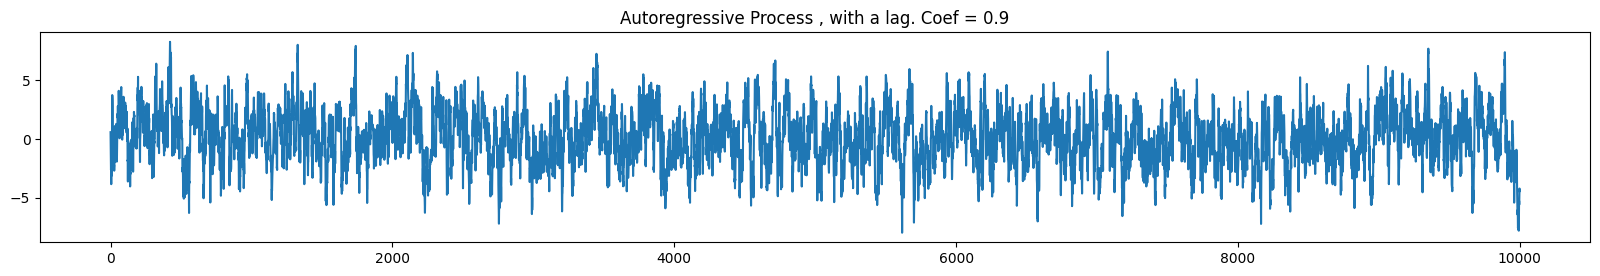

In [3]:
coef = 0.9
plt.subplot(2,1,1)
ar = np.array([1, -0.9])
ma = np.array([1])

titulo = 'Autoregressive Process , with a lag. Coef = ' + str(coef)
AR_model = ArmaProcess(ar, ma)
plt.rc("figure", figsize=(20,4))


AR_simulacion = pd.Series(AR_model.generate_sample(nsample=10000))
AR_simulacion.plot(figsize = (20,6), title=titulo)
plt.show()

# 3. LSTM

## 3.1 First *Architecture* [2 lags]

### Data Preprocessing

In [4]:
datos_cortados = np.empty((1,2,1))
y = np.empty((1,))
for element in AR_simulacion.index[:-3]:
  muestra = np.array([[[AR_simulacion[element]], [AR_simulacion[element + 1]]]])
  datos_cortados = np.append(datos_cortados, muestra, axis=0)

  y = np.append(y, AR_simulacion[element + 2])

  # SALIDA TIENE QUE SER (x, 2, 1)

In [5]:
AR_simulacion

,0
0,0.583444
1,-0.834420
2,-2.045593
3,-2.623884
4,-2.444987
...,...
9995,-5.273783
9996,-5.601225
9997,-4.496363
9998,-4.225756


In [6]:
datos_cortados[9997]

array([[-5.60122472],
       [-4.49636302]])

In [7]:
y[9997]

-4.225756159754445

In [8]:
AR_simulacion.shape

(10000,)

In [9]:
datos_cortados.shape

(9998, 2, 1)

In [10]:
y.shape

(9998,)

In [11]:
train = datos_cortados[1:, :].copy()
target = y[1:].copy()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    train,
    target,
    shuffle=False,
    random_state=10,
    train_size=.90
)


### LSTM Definition

In [13]:
# Definicion de las capas
price_input = layers.Input(
    shape = (2, 1),
    name = 'price_input'
)

price_lstm = layers.LSTM(
    units=1,
    name = 'price',
    recurrent_activation='linear'
)

# Como se conectan las capas definidas arriba
price_output = price_lstm(price_input)

In [14]:
# Instanciación del objeto modelo
model = keras.Model(price_input, price_output)

model.compile(
    loss = 'mean_squared_error'
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ price_input (InputLayer)             │ (None, 2, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ price (LSTM)                         │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

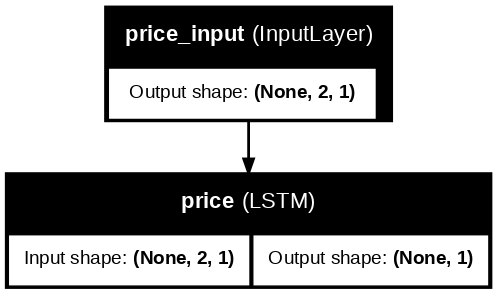

In [15]:
# Visualización del modelo
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

### Training

In [16]:
tf.random.set_seed(20)
np.random.seed(10)

In [17]:
history = model.fit(
    x_train, y_train,
    batch_size = 128,
    epochs = 100,  # Valor real de 1000
).history


Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 2.9092
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.6625
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.4112
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.2854
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.2131
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.1683
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1366
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.1122
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0928
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.0773
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.0652
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.0558
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0487
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 1.0433
Epoch 15/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.0393
Epoc

### Test

In [18]:
### loss
x = list(range(len(history['loss'])))
fig = go.Figure()
fig.add_trace(go.Scatter(x = x, y = history['loss']))

fig.show()

In [19]:
y_pred = model.predict(x_train)

282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


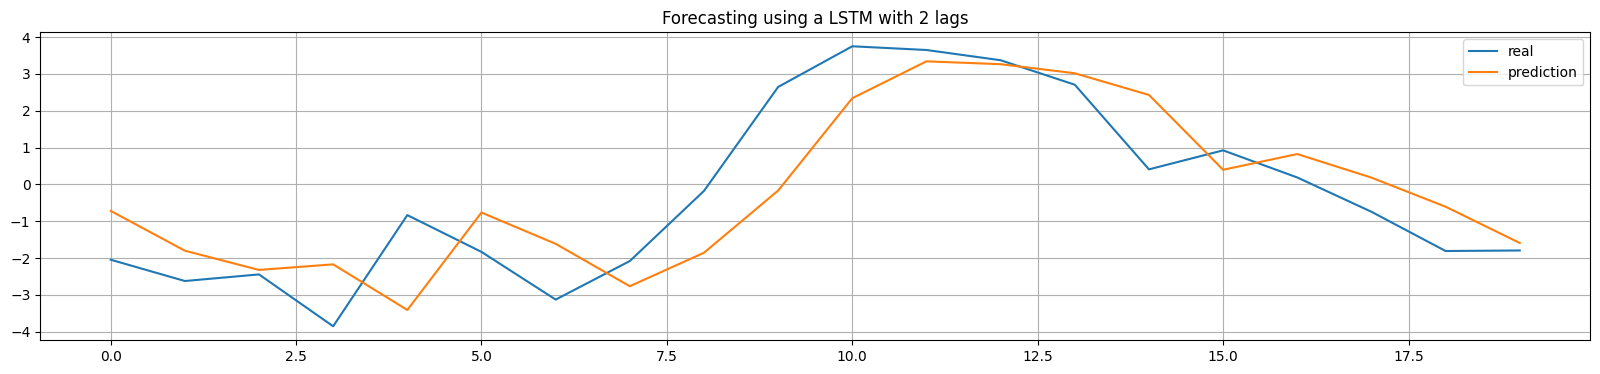

In [20]:
plt.title('Forecasting using a LSTM with 2 lags')
plt.plot(y_train[:20], label='real')
plt.plot(y_pred[:20], label='prediction')
plt.legend()
plt.grid()

In [21]:
model.get_weights()

[array([[ 1.8980256 , -0.06163749,  3.0210297 ,  0.8811154 ]],
       dtype=float32),
 array([[0.57647425, 0.46083468, 1.9050312 , 0.01165608]], dtype=float32),
 array([0.01281767, 1.9870355 , 0.00639775, 0.00973056], dtype=float32)]

## 3.3 Second *Architecture* [4 lags]

### Data Preprocessing

In [32]:
datos_cortados = np.empty((1,4,1))
y = np.empty((1,))

for element in AR_simulacion.index[:-5]:
  muestra = np.array([[[AR_simulacion[element]], [AR_simulacion[element + 1]], [AR_simulacion[element + 2]], [AR_simulacion[element + 3]]]])
  datos_cortados = np.append(datos_cortados, muestra, axis=0)

  y = np.append(y, AR_simulacion[element + 4])

In [33]:
datos_cortados.shape

(9996, 4, 1)

In [34]:
y.shape

(9996,)

### LSTM Definition

In [35]:
# layers
price_input = layers.Input(shape = (4, 1), name = 'price_input')
price_lstm = layers.LSTM(1  , name = 'price', recurrent_activation='linear')

# conection
price_output = price_lstm(price_input)

In [36]:
# model instance
model = keras.Model(price_input, price_output)

model.compile(
    loss = 'mean_squared_error'
)

model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ price_input (InputLayer)             │ (None, 4, 1)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ price (LSTM)                         │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12 (48.00 B)

 Trainable params: 12 (48.00 B)

 Non-trainable params: 0 (0.00 B)

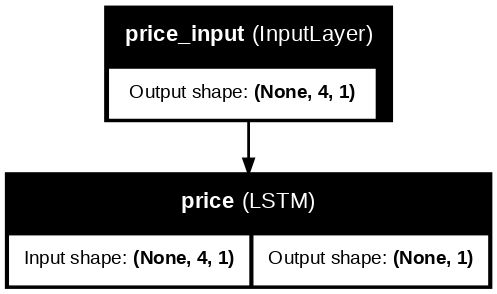

In [37]:
# visualozation
keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TD",
    dpi=100,
)

### Training

In [38]:
train = datos_cortados[1:, :].copy()
target = y[1:].copy()

In [39]:
history = model.fit(
    train, target,
    batch_size = 128,
    epochs = 100,  # Valor real de 1000
).history

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 8.9791
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.3264
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 7.6902
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.0319
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5.6590
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4323
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1043
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9188
Epoch 9/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8561
Epoch 10/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8264
Epoch 11/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8075
Epoch 12/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.7894
Epoch 13/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7804
Epoch 14/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7627
Epoch 15/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.8017
Epoc

### Test

In [40]:
y_pred = model.predict(train)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


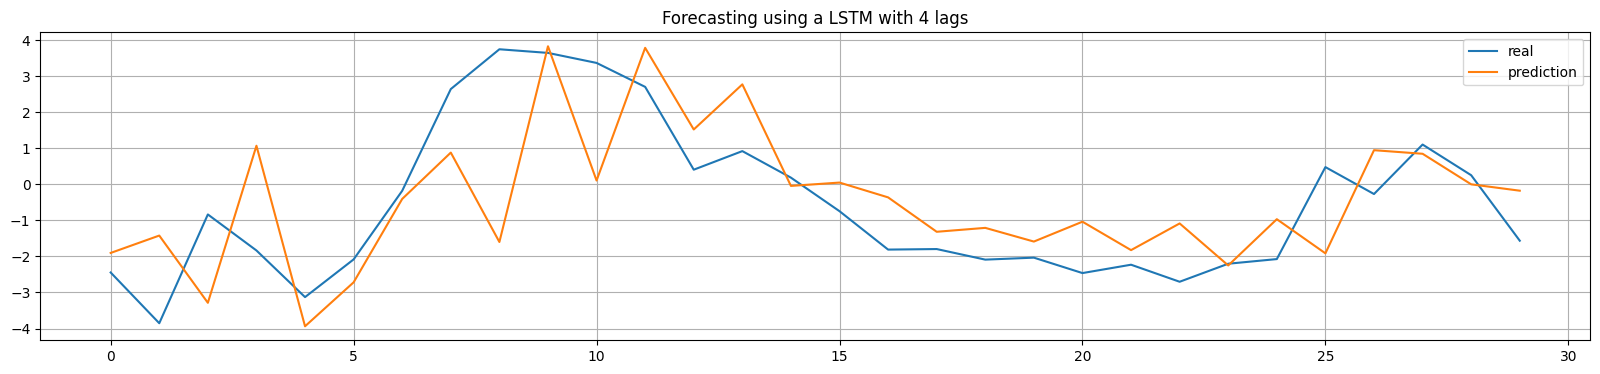

In [44]:
plt.title('Forecasting using a LSTM with 4 lags')
plt.plot(target[:30], label='real')
plt.plot(y_pred[:30], label='prediction')
plt.legend()
plt.grid()

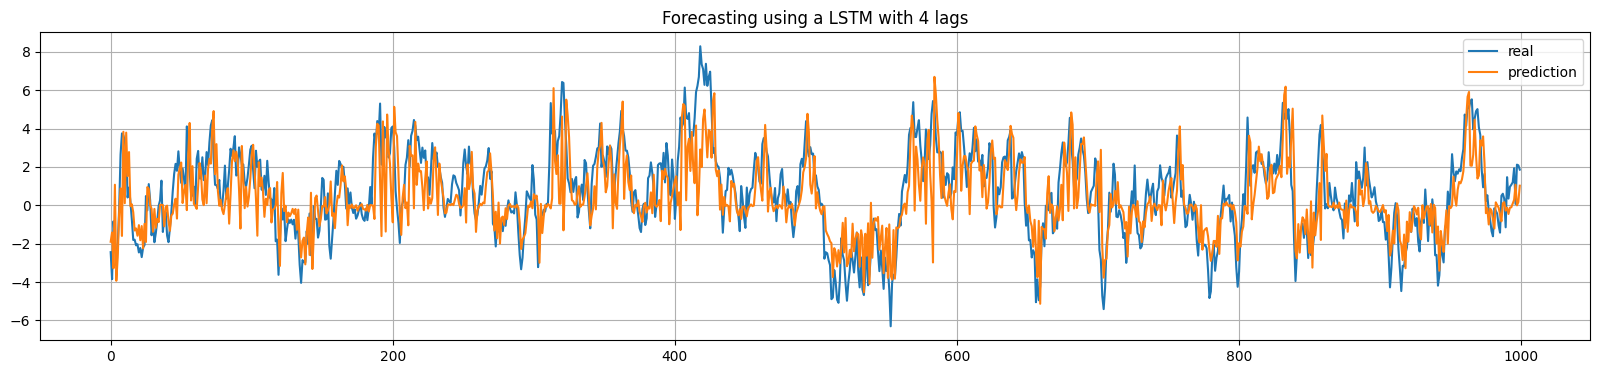

In [46]:
plt.title('Forecasting using a LSTM with 4 lags')
plt.plot(target[:1000], label='real')
plt.plot(y_pred[:1000], label='prediction')
plt.legend()
plt.grid()

# 4. ARCH

In [53]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 12.2 MB/s eta 0:00:00


In [54]:
from random import gauss

# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)

from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model

### Data Preprocessing

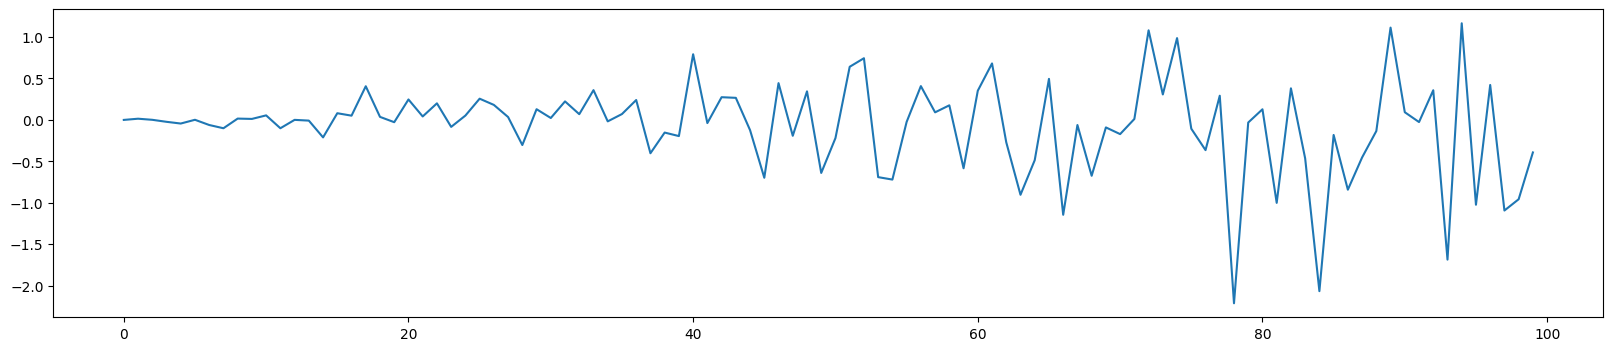

In [55]:
data = [gauss(0, i*0.01) for i in range(0,100)]

pyplot.plot(data)
pyplot.show()

In [56]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

### EDA

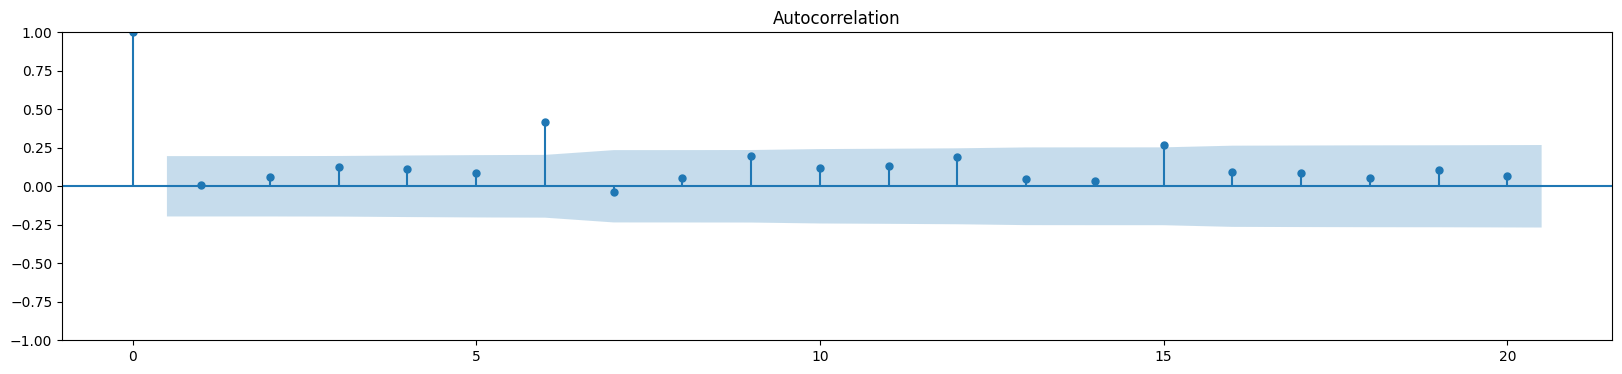

In [57]:
# square the dataset
squared_data = [x**2 for x in data]
# create acf plot
plot_acf(np.array(squared_data))
pyplot.show()

### Training

In [58]:
# define model
model = arch_model(train, mean='Zero', vol='ARCH', p=15)

# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:     18,   Neg. LLF: 88214.15274343832
Iteration:      2,   Func. Count:     36,   Neg. LLF: 145.16327370105464
Iteration:      3,   Func. Count:     54,   Neg. LLF: 128.0887135967567
Iteration:      4,   Func. Count:     72,   Neg. LLF: 109.21731760967693
Iteration:      5,   Func. Count:     90,   Neg. LLF: 36.505726167454
Iteration:      6,   Func. Count:    108,   Neg. LLF: 39.65736210558854
Iteration:      7,   Func. Count:    126,   Neg. LLF: 28.719728253674663
Iteration:      8,   Func. Count:    143,   Neg. LLF: 28.02026266328528
Iteration:      9,   Func. Count:    161,   Neg. LLF: 34.947196664051255
Iteration:     10,   Func. Count:    180,   Neg. LLF: 30.036303168280703
Iteration:     11,   Func. Count:    198,   Neg. LLF: 26.9167818648405
Iteration:     12,   Func. Count:    216,   Neg. LLF: 35.23299678777928
Iteration:     13,   Func. Count:    235,   Neg. LLF: 25.557794471124332
Iteration:     14,   Func. Count:    253,   Neg. LLF: 25.4968

### Test

In [59]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

In [60]:
yhat.variance.values

array([[2.09288593, 0.09017704, 1.30488414, 1.0612594 , 0.25690557,
        0.85993409, 1.82286954, 0.39067782, 1.13007601, 0.9127748 ]])

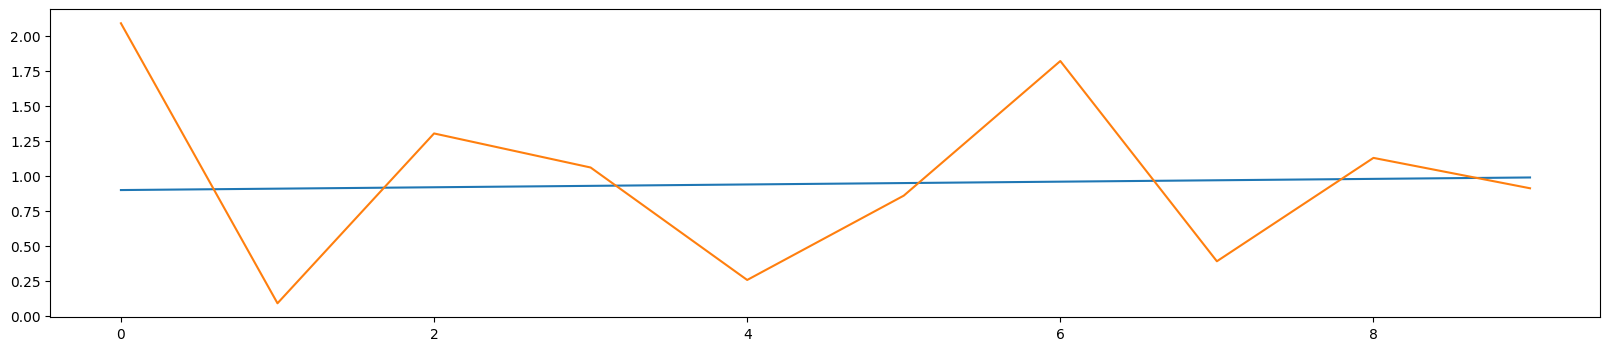

In [66]:
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])

# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

# 5. Conclusions

- LSTM: for these two models, it looks that the predictions are similar to the past value. This means that the model's forecast is not reliable.

- ARCH: for this model, the prediction is always between a vey small range, and it is not representing the real process.